## 사이킷런으로 LinearRegression 모델을 사용해보자

y = wx + b (weights)

w값과 b값을 주어진 데이터를 이용해서 최적화 시키는 문제(지도학습)

multi-variable linear regression  
y = w1x1 + w2x2 + b


In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

**x 데이터 생성**

In [4]:
n=10
# x = [0,1,2,3,4,5,6,7,8,9]
# 1차원 데이터 : numpy.ndarry + range(10)
x = np.arange(n)
print(x)
print(type(x))
print(x.shape)  #10행

[0 1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'>
(10,)


In [5]:
# 2차원 데이터
# reshape()의 '-1'은
# "원래 배열의 길이와 남은 차원으로 부터 추정"
# 배열의 차원을 변경시키는 함수
# 뒤에 1(열의 갯수)고정
# 10행 -> 10행 1열
x = np.arange(n).reshape(-1, 1)
print(x)
print(x.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(10, 1)


**y데이터 생성**

In [6]:
# y = 2x+1
y = (2*x + 1)

In [7]:
print(y)
print(y.shape)

[[ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]
 [13]
 [15]
 [17]
 [19]]
(10, 1)


In [8]:
# numpy의 random.seed()함수에 seed값 설정
np.random.seed(14)

# 10개의 난수를 생성
# 0~1사이의 난수가 생성
randValue = np.random.random(n)*3
print(randValue)

randValue = randValue.reshape(-1,1)
y = (2*x + 1)

# 2x+1 + 난수
y = y + randValue
y

[1.54183003 2.31949516 2.61128306 0.02414085 0.92920778 2.87281122
 1.53935014 0.95485327 1.61759981 0.66376483]


array([[ 2.54183003],
       [ 5.31949516],
       [ 7.61128306],
       [ 7.02414085],
       [ 9.92920778],
       [13.87281122],
       [14.53935014],
       [15.95485327],
       [18.61759981],
       [19.66376483]])

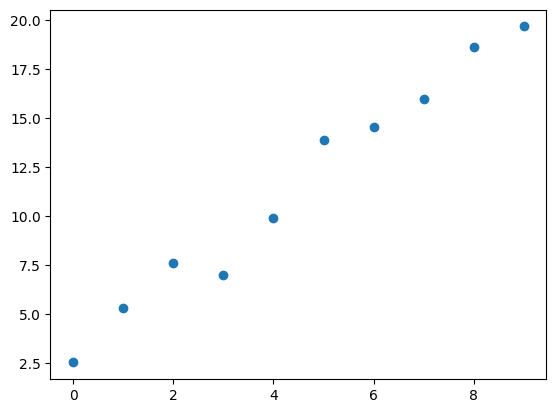

In [9]:
# matplotlib으로 그려보기
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y)
plt.show()

## 모델의 선언, fit(학습), predict(예측)

In [ ]:
# STEP 1. 모델 선언
model = LinearRegression()

In [ ]:
# STEP 2. 학습
# x데이터(문제)와 y데이터(레이블) -> 지도학습
model.fit(x, y)

LinearRegression()

In [ ]:
# 모델에서 찾은 기울기(w)
print(model.coef_)
# 모델에서 찾은 바이어스(b)
print(model.intercept_)

[[1.91146199]]
[2.90585466]


In [ ]:
# STEP 3. 예측
prediction = model.predict([[20.0],[21.0]])

In [ ]:
prediction

array([[41.13509444],
       [43.04655643]])

## **train_test_split**  
scikit-learn의 train_test_split은 데이터를 나누어 주는 함수이다.  

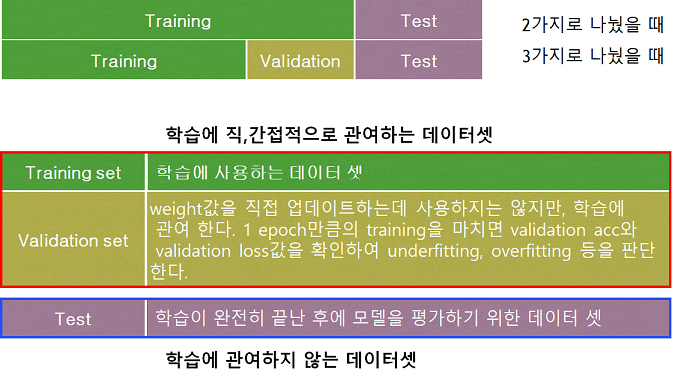

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = [[0,1],[2,3],[4,5],[6,7],[8,9]]
Y = [0,1,2,3,4]

# 데이터(X)만 넣었을 경우
# train : test = 8 : 2
# X 데이터셋(리스트)을 나누는데 test-> 0.2, train->0.8
# random_state -> random.seed값으로 이해
X_train, X_test = train_test_split(X, test_size=0.2, random_state=123)
                    # renadom_state를 고정시켜줌으로써 100개의 train data 중 바뀌지 않는 테스트 데이터를 만들어준다
                    # 테스트 데이터가 계속 바뀌면 이놈이 미래 예측을 잘 못할 경우가 많아
                    # 10문제 중에 니가 하는 문제 10개는 꼭 시험에 내줄게. 힘내서 시험 잘봐야한다?
                    # 하고 체리피킹하는 목적

# X_train : [[0,1],[6,7],[8,9],[2,3]]
# X_test : [[4,5]]

print(X_train)
print(X_test)

[[6, 7], [8, 9], [0, 1], [4, 5]]
[[2, 3]]


In [ ]:
# 데이터(X)와 레이블(Y)을 넣었을 경우
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=321)
                                    # x, y를 같이 shuffle. 비율은 8:2
                                    # 문법 순서만 기억하면 됨

# X_train : [[4,5],[0,1],[6,7]]
# Y_train : [2,0,3]
# X_test : [[2,3],[8,9]]
# Y_test : [1,4]
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[2, 3], [0, 1], [4, 5], [8, 9]]
[1, 0, 2, 4]
[[6, 7]]
[3]


## 당뇨병 1년후 병의 진전도 예측하는 모델

### load_diabetes()함수를 사용하여 데이터 준비하기

In [ ]:
# 사이킷런에서 사이킷런 공부하라고 주는 Toydatasets를 불러오자
# https://scikit-learn.org/stable/datasets/toy_dataset.html

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [ ]:
# dict 타입으로 출력
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

### 데이터셋의 특성을 확인해 본다

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

**Age** : 나이  
**Sex** : 성별  
**Body mass index(BMI)** : 체질량 지수, 사람의 비만도를 나타내는 지수로, 체중과 키의 관계로 계산된다.  
**Average blood pressure** : 평균혈압  
**S1, S2, S3, S4, S5, S6** : six blood serum measurements   

In [ ]:
# 데이터프레임에서 columns로 사용할 수 있는 리스트
features = diabetes.feature_names
print('feature names:', features)

feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
# data와 target의 shape를 확인해본다.
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [ ]:
# x데이터 먼저 df에 넣는다

import numpy as np
import pandas as pd
from sklearn import datasets

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [ ]:
df

# 개인정보를 삭제한 표준화를 거친 데이터라 일반적인 형태의 데이터가 아님

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
# target 데이터를 dataFrame에 함께 저장하기
df['target'] = diabetes.target

In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


In [ ]:
# 행과 열 크기 확

df.shape #(442, 11)

(442, 11)

In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


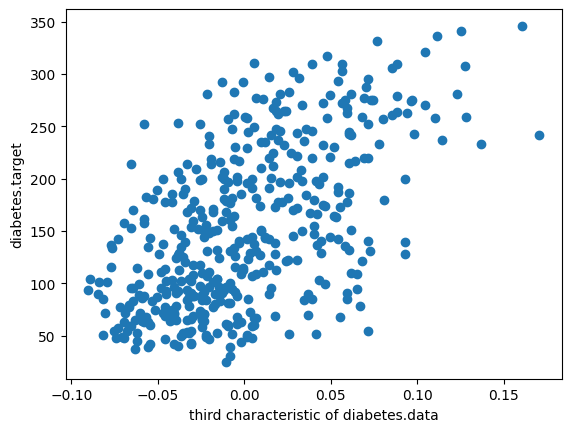

In [ ]:
import matplotlib.pyplot as plt

X = diabetes.data
Y = diabetes.target

# bmi를 scatter 그래프로 그려보자
plt.scatter(X[:,2],Y)
plt.xlabel('third characteristic of diabetes.data')
plt.ylabel('diabetes.target')
plt.show()

<Figure size 3000x1200 with 0 Axes>

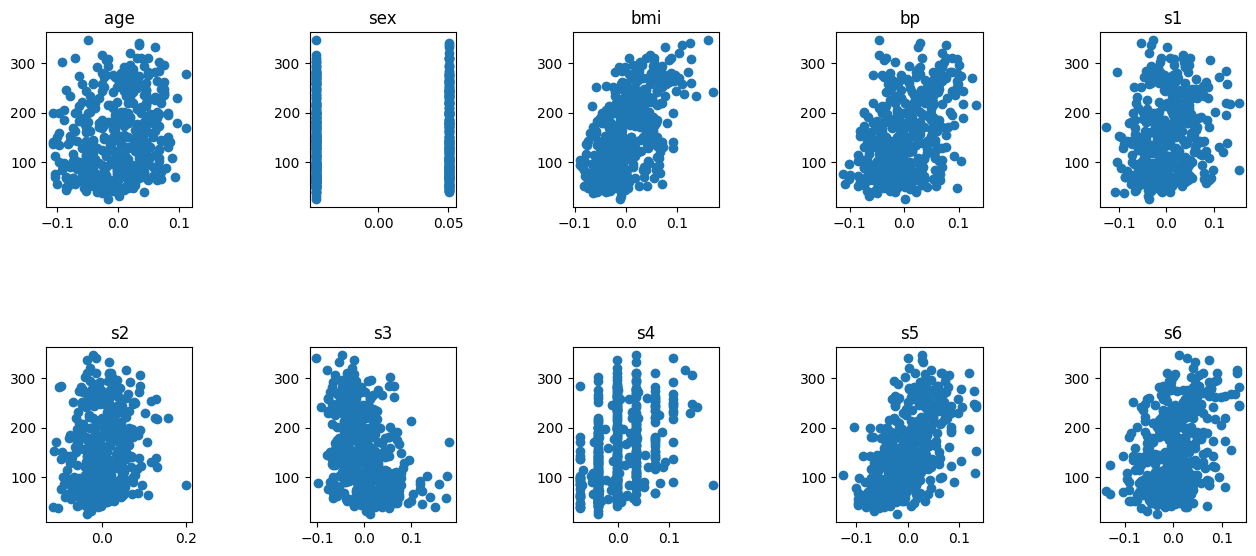

In [ ]:
# 1개의 figure에 10개의 subplot를 그려서, 변수들과 당뇨병(y)의 대략적이 관계를 파악.
# y ~ age, y ~ sex, y ~ bmi, ...
plt.figure(figsize=(30,12))
fig, ax = plt.subplots(2, 5, figsize=(30,7))

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.5, top=0.8, wspace=0.8, hspace=0.8)
# ax: 3x4 형태의 2차원 배열(ndarray)
ax_flat = ax.flatten()  # 3*4 행렬을 순차적으로 불러오기 위해 flatten 함수 사용
for i in range(len(features[0:10])):
    subplot = ax_flat[i]
    subplot.scatter(X[:, i], Y)
    subplot.set_title(features[i])
plt.show()

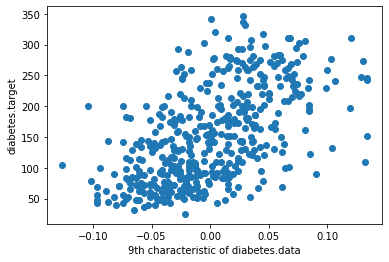

In [ ]:
import matplotlib.pyplot as plt

X = diabetes.data
Y = diabetes.target


plt.scatter(X[:,8],Y)
plt.xlabel('9th characteristic of diabetes.data')
plt.ylabel('diabetes.target')
plt.show()

In [ ]:
# bmi column을 가지고 linear_regression을 한다.
bmi = X[:, np.newaxis, 2] # data에서 'bmi' 컬럼만 선택

In [ ]:
bmi.shape

(442, 1)

In [ ]:
# scikit-learn의 Linear Regression은 훈련 데이터 세트가 반드시 2차원 배열이어야 함.
# 2차원 배열 형태의 훈련 데이터 세트만 사용하기 때문에
print('bmi.shape:',bmi.shape)
print('bmi[:5] =',bmi[:5])

bmi.shape: (442, 1)
bmi[:5] = [[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


In [ ]:
from sklearn.model_selection import train_test_split

# 전체 데이터가 442개
# train : test = 8(353) : 2(89)
# bmi_train, bmi_test = train_test_split(bmi, test_size=0.2, random_state=99)
# y_train, y_test = train_test_split(Y, test_size=0.2, random_state=99)

bmi_train, bmi_test, y_train, y_test = train_test_split(bmi,Y, test_size=0.2, random_state=99)

In [ ]:
print(bmi_train.shape)
print(bmi_test.shape)

(353, 1)
(89, 1)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(353,)
(89,)


In [ ]:
from sklearn.linear_model import LinearRegression

# STEP 1. 모델 선언
model = LinearRegression()

In [ ]:
# STEP 2. 학습진행, 학습데이터(X, Y)
model.fit(bmi_train, y_train)

LinearRegression()

In [ ]:
print('coefficients:', model.coef_)     # W값
print('intercept:', model.intercept_)   # B값

coefficients: [975.08825788]
intercept: 153.40202437029825


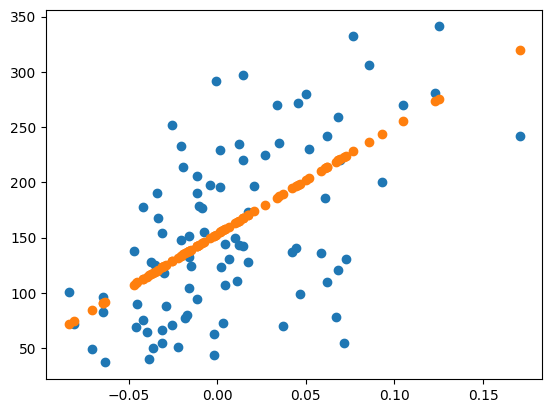

In [ ]:
y_pred = model.predict(bmi_test)
plt.scatter(bmi_test, y_test)    # 실제 값
plt.scatter(bmi_test, y_pred)    # 예측 값
plt.show()

## bmi와 s5가 diabets값과 상관관계가 있어 보여서 X를 2개를 사용해서 학습

In [ ]:
data = df[['bmi','s5']]
print(data)
print(data.shape)

          bmi        s5
0    0.061696  0.019907
1   -0.051474 -0.068332
2    0.044451  0.002861
3   -0.011595  0.022688
4   -0.036385 -0.031988
..        ...       ...
437  0.019662  0.031193
438 -0.015906 -0.018114
439 -0.015906 -0.046883
440  0.039062  0.044529
441 -0.073030 -0.004222

[442 rows x 2 columns]
(442, 2)


In [ ]:
from sklearn.model_selection import train_test_split

#data_train, data_test = train_test_split(data, test_size=0.2, random_state=99)
#y_train, y_test = train_test_split(Y, test_size=0.2, random_state=99)
data_train, data_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=99)

In [ ]:
print(data_train.shape)
print(data_test.shape)

(353, 2)
(89, 2)


In [ ]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(data_train, y_train)

LinearRegression()

In [ ]:
# x1 : bmi, w1
# x2 : s5,  w2
# target -> 정답

# y(예측값) = w1x1 + w2x2 + b
# multi-variable linear regression, 지도학습, 신경망을 이용한 방법론
# hidden layer가 없는 신경망

print('coefficients:', model2.coef_)
print('intercept:', model2.intercept_)

# W * 2개, B * 1개

coefficients: [704.67572069 597.58233621]
intercept: 154.27924655260355


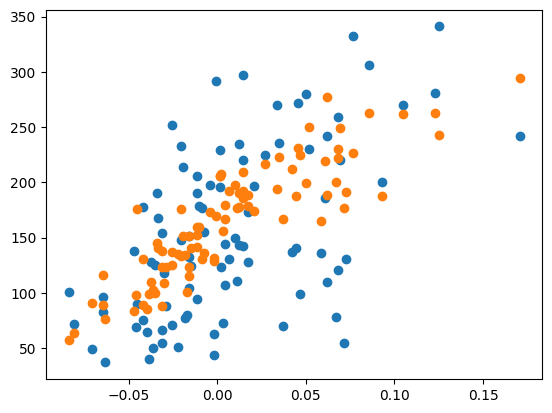

In [ ]:
y_pred = model2.predict(data_test)
plt.scatter(bmi_test, y_test) # 실제 값
plt.scatter(bmi_test, y_pred)
plt.show()

In [ ]:
# 여기는 결측치도 없고 그냥 표준화된 데이터를 넣어서
# 모델을 어떻게 돌리는지.에 초점이 맞춰져 있음